<a href="https://colab.research.google.com/github/nonengismrynti/klasifikasii/blob/main/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Load dataset
perth_file_path = '/content/Klasifikasi Tingkat Kemiskinan di Indonesia.csv'

ptemp_data = pd.read_csv(perth_file_path, delimiter=';')


In [ ]:
# Ubah data ke int
for attribute in ptemp_data:
    ptemp_data[attribute] = LabelEncoder().fit_transform(ptemp_data[attribute])

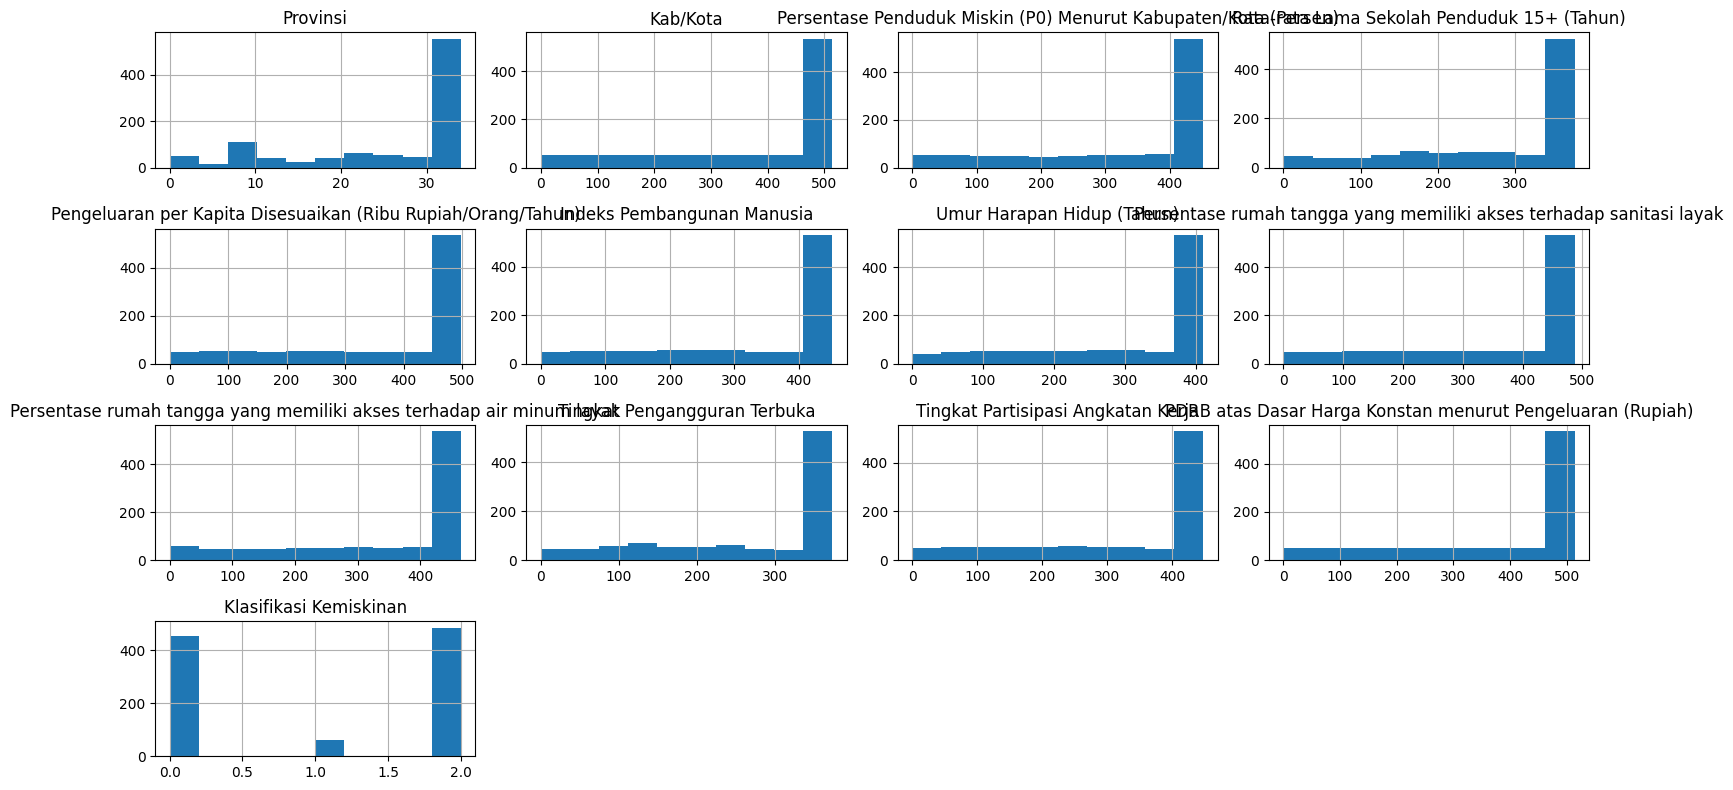

In [ ]:
# Histogram
ptemp_data.hist(figsize=(15, 8))
plt.title('Pesebaran Data')
plt.tight_layout()
plt.show()

In [ ]:
# Definisi fitur (features) dan target (target)
features = ['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
            'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
            'Indeks Pembangunan Manusia',
            'Umur Harapan Hidup (Tahun)',
            'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
            'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
            'Tingkat Pengangguran Terbuka',
            'Tingkat Partisipasi Angkatan Kerja',
            'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)']

target_column = 'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'
target = (ptemp_data[target_column] > 20).astype(int)# Binary classification

In [ ]:
# Split data menjadi data latih dan data uji
train_X, val_X, train_Y, val_Y = train_test_split(ptemp_data[features], target, random_state=0)

In [ ]:

df_clear_Logistic_Regression = LogisticRegression(random_state=0).fit(train_X, train_Y)

In [ ]:

val_predictions = df_clear_Logistic_Regression.predict(val_X)

In [ ]:

accuracy = accuracy_score(val_Y, val_predictions)
print(f'Akurasi Model: {accuracy}')

Akurasi Model: 0.972


In [ ]:

print("Laporan Klasifikasi:")
print(classification_report(val_Y, val_predictions))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      1.00      0.99       243

    accuracy                           0.97       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.94      0.97      0.96       250

